In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from konlpy.tag import Okt
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [11]:
print('훈련용 리뷰 개수 : ', len(train_data))

훈련용 리뷰 개수 :  150000


In [12]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [13]:
print('테스트용 리뷰 개수 : ', len(test_data))

테스트용 리뷰 개수 :  50000


In [14]:
# nunique : 중복을 제외한 갯수
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [15]:
# drop_duplicates : 중복된 데이터 제거
train_data.drop_duplicates(subset=['document'], inplace=True)

In [16]:
print('총 샘플의 수 : ', len(train_data))

총 샘플의 수 :  146183


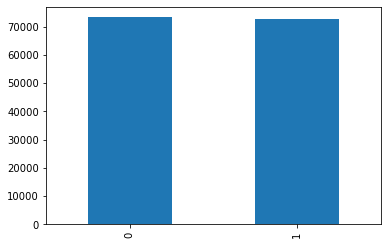

In [20]:
train_data['label'].value_counts().plot(kind='bar')

In [21]:
print(train_data.groupby('label').size().reset_index(name='count'))

   label  count
0      0  73342
1      1  72841


In [22]:
# Nan값이 있는지 확인
print(train_data.isnull().values.any())

True


In [23]:
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [24]:
train_data.loc[train_data['document'].isnull()]

,id,document,label
25857,2172111,NaN,1


In [25]:
# dropna : Nan값이 있는 axis 제거
train_data = train_data.dropna(how='any') 
print(train_data.isnull().values.any())

False


# 한글 범위
https://www.unicode.org/charts/PDF/U3130.pdf
ㄱ ~ ㅎ: 3131 ~ 314E
ㅏ ~ ㅣ: 314F ~ 3163
# 완성형 한글 범위 ex) 힣
https://www.unicode.org/charts/PDF/UAC00.pdf


In [26]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")
train_data[:5]

,id,document,label
0,9976970,아더빙진짜짜증나네요목소리,0
1,3819312,흠포스터보고초딩영화줄오버연기조차가볍지않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소이야기구먼솔직히재미는없다평점조정,0
4,6483659,사이몬페그의익살스런연기가돋보였던영화스파이더맨에서늙어보이기만했던커스틴던스트가너무나도이...,1


In [30]:
train_data['document'].replace('',np.nan,inplace=True) # 아무것도 안적혀있는 것을 Nan으로 교체
print(train_data.isnull().sum())

id            0
document    789
label         0
dtype: int64


In [31]:
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [33]:
train_data = train_data.dropna(how='any')
print(len(train_data))

145393


In [36]:
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")
test_data['document'].replace('', np.nan, inplace=True)
print('전처리 후 테스트용 샘플의 갯수 : ', len(test_data))

전처리 후 테스트용 샘플의 갯수 :  48212


# 토큰화
- 불용어 제거(불용어는 사용자가 정의하기 나름)

okt = Okt() \
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔'] << 이 처럼 변환된다

In [40]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [63]:
okt = Okt()
X_train = []
for sentence in train_data['document']:
    temp_X = []
    temp_X = Okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_train.append(temp_X)

JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [2]:
import nltk

In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
